In [1]:
import libpysal as lps
import matplotlib.pyplot as plt
import numpy as np

import esda
from esda.join_counts import Join_Counts

In [2]:
w = lps.weights.lat2W(4, 4)
y = np.ones(16)
y[0:8] = 0
np.random.seed(12345)

In [3]:
jc = Join_Counts(y, w)
jc.bb

np.float64(10.0)

In [4]:
jc.crosstab

Neighbor,W,B
Focal,,
W,10.0,2.0
B,2.0,10.0


In [5]:
jc.expected

Neighbor,W,B
Focal,,
W,6.0,6.0
B,6.0,6.0


In [6]:
jc.chi2

np.float64(8.166666666666666)

In [7]:
jc.chi2_p

np.float64(0.004266724822176131)

In [8]:
jc.p_sim_chi2

np.float64(0.008)

In [9]:
import seaborn as sns

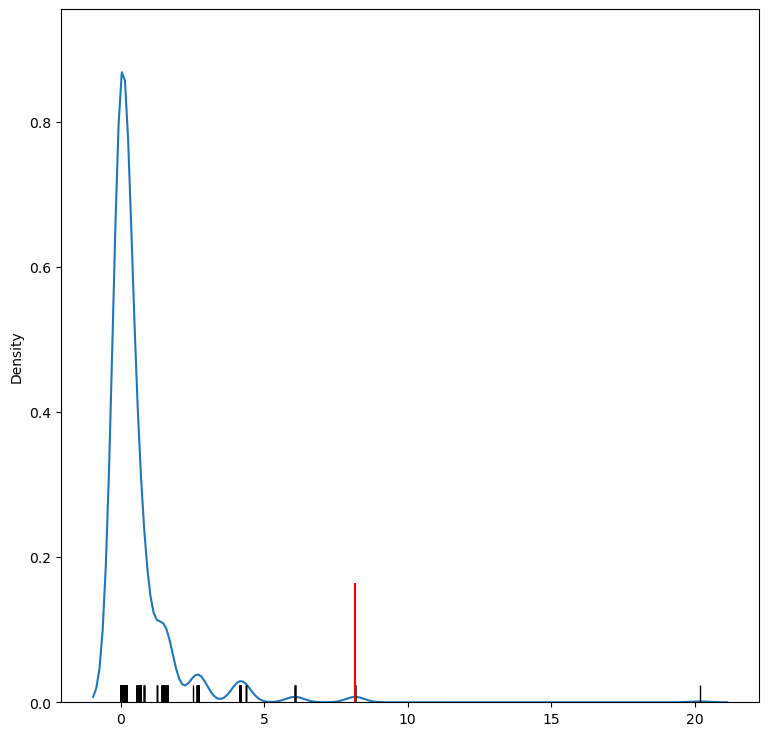

In [10]:
f, ax = plt.subplots(1, figsize=(9, 9))
sns.kdeplot(jc.sim_chi2, ax=ax)
sns.rugplot(jc.sim_chi2, color="k", ax=ax)
plt.axvline(jc.chi2, 0, 0.17, color="r")

Text(0.5, 1.0, 'BB Counts')

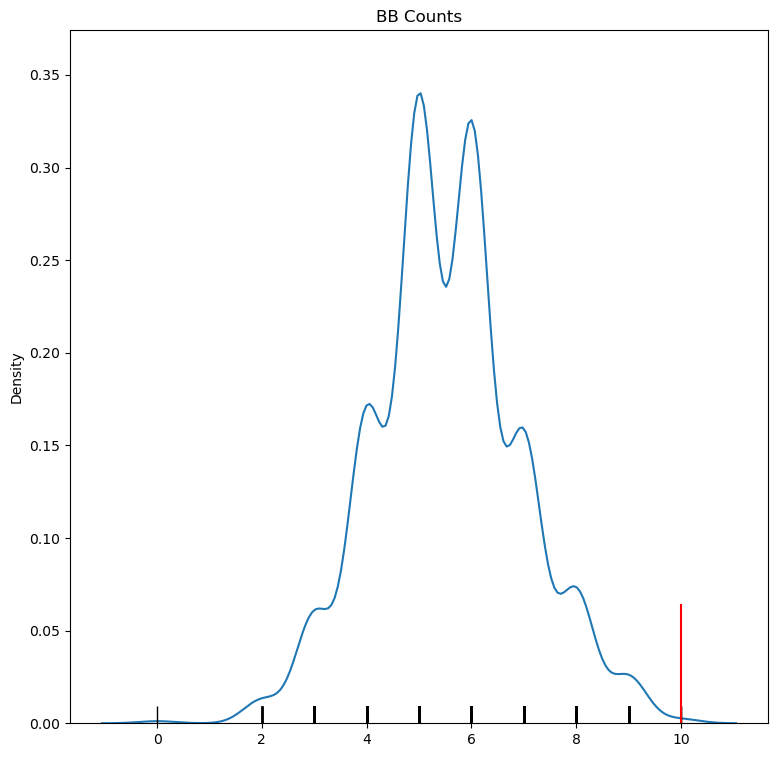

In [11]:
f, ax = plt.subplots(1, figsize=(9, 9))
sns.kdeplot(jc.sim_bb, ax=ax)
sns.rugplot(jc.sim_bb, color="k", ax=ax)
plt.axvline(jc.bb, 0, 0.17, color="r")
plt.title("BB Counts")

Text(0.5, 1.0, 'WW Counts')

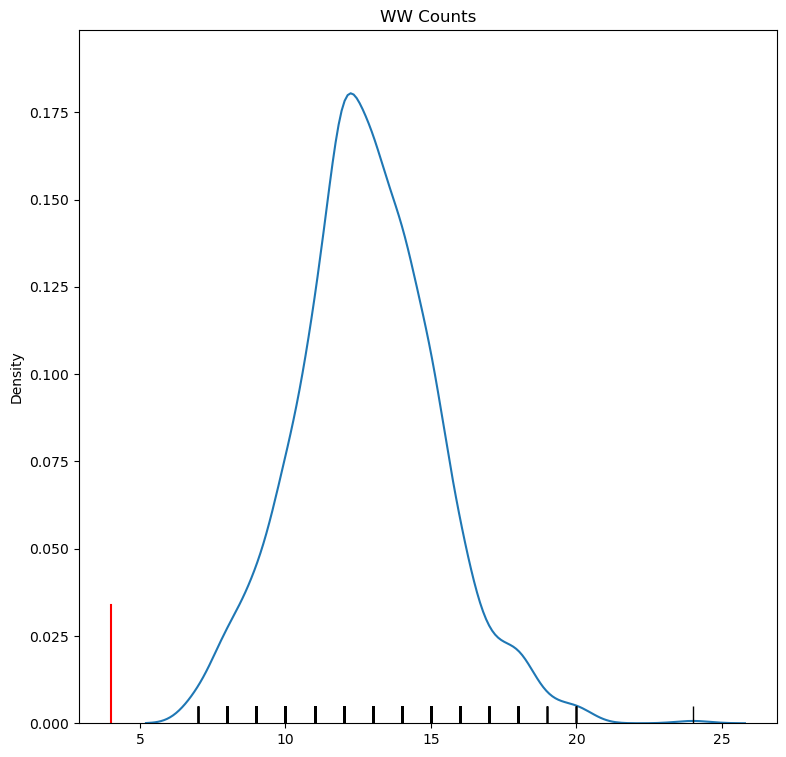

In [12]:
f, ax = plt.subplots(1, figsize=(9, 9))
sns.kdeplot(jc.sim_bw, ax=ax)
sns.rugplot(jc.sim_bw, color="k", ax=ax)
plt.axvline(jc.bw, 0, 0.17, color="r")
plt.title("WW Counts")